# Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/dataXid.csv")

In [3]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [5]:
features_f

Index(['edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'mediana_nom3_desv',
       'mediana_pen3_desv', 'ingreso_nompen_desv', 'ingreso_final_desv',
       'ingreso_nompen', 'ingreso_final', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota_rotativos', 'cuota_de_sector_solidario',
       'cuota_sector_real_comercio', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar',
       'ciudad_residencia_tag_ind', 'ciudad_residencia_tag_gasto_familiar',
       'ciudad_residencia_tag_ingreso_nompen'],
      dtype='object')

In [6]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,1092553,2,M,553563
estado_civil,1092553,5,SOLTERO,605311
nivel_academico,1092553,6,UNIVERSITARIO,720807
profesion,1092553,79,OTROS,621847
ocupacion,1092553,10,Empleado,697681
ciudad_residencia,1092553,1434,BOGOTA D.C.,278442
rep_calif_cred,1092553,8,A,324135


# One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df, columns=features_o)
list(df_onehot.columns)

['edad',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cupo_total_tc',
 'codigo_ciiu',
 'ctas_activas',
 'ctas_embargadas',
 'mediana_nom3',
 'ind_mora_vigente',
 'cartera_castigada',
 'tenencia_tc',
 'tiene_consumo',
 'tiene_crediagil',
 'tiene_ctas_activas',
 'tiene_ctas_embargadas',
 'pension_fopep',
 'tiene_cred_hipo_1',
 'tiene_cred_hipo_2',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'mediana_nom3_desv',
 'mediana_pen3_desv',
 'ingreso_nompen_desv',
 'ingreso_final_desv',
 'ingreso_nompen',
 'ingreso_final',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_de_sector_solidario',
 'cuota_sector_real_comercio',
 'pol_centr_ext',
 'saldo_prom3_tdc_mdo',
 'cupo_tc_mdo',
 'cant_oblig_tot_sf',
 'cant_cast_ult_12m_sr',
 'saldo_no_rot_mdo',
 'ind',
 'gasto_familiar',
 'estado_civil_tag_ind',
 'nivel_academico_tag_ind',
 'profesion_tag_ind',
 'ocupacion_tag_ind',
 'ciudad_residencia_ta

In [8]:
df_onehot

,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,mediana_nom3,...,ciudad_residencia_ZU#IGA,ciudad_residencia_ZULIA,rep_calif_cred_A,rep_calif_cred_B,rep_calif_cred_C,rep_calif_cred_D,rep_calif_cred_E,rep_calif_cred_F,rep_calif_cred_G,rep_calif_cred_H
0,36.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,0.0,...,0,0,0,0,1,0,0,0,0,0
1,33.0,3.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,0.0,...,0,0,0,0,0,1,0,0,0,0
2,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8230.0,1.049426,0.003173,0.0,...,0,0,1,0,0,0,0,0,0,0
3,27.0,1.0,0.0,0.0,0.0,1.328622e+07,10.0,1.049426,0.003173,0.0,...,0,0,0,0,0,1,0,0,0,0
4,29.0,1.0,0.0,0.0,0.0,0.000000e+00,1410.0,1.049426,0.003173,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092548,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8299.0,1.049426,0.003173,0.0,...,0,0,0,0,1,0,0,0,0,0
1092549,25.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,0.0,...,0,0,0,0,0,1,0,0,0,0
1092550,25.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,0.0,...,0,0,0,0,0,1,0,0,0,0
1092551,30.0,0.0,0.0,0.0,0.0,1.922503e+06,10.0,1.049426,0.003173,2302697.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_onehot.shape

(1092553, 1604)

# PCA - _Principal Component Analysis_

## Standardization

In [10]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1092553.0,-0.0,1.0,-1.67,-0.80,-0.22,0.59,5.69
1,1092553.0,-0.0,1.0,-0.26,-0.26,-0.26,-0.23,109.55
2,1092553.0,0.0,1.0,-0.17,-0.17,-0.17,-0.17,14.42
3,1092553.0,-0.0,1.0,-0.12,-0.12,-0.12,-0.12,18.71
4,1092553.0,-0.0,1.0,-0.09,-0.09,-0.09,-0.09,22.66
...,...,...,...,...,...,...,...,...
1599,1092553.0,-0.0,1.0,-0.40,-0.40,-0.40,-0.40,2.51
1600,1092553.0,0.0,1.0,-0.30,-0.30,-0.30,-0.30,3.29
1601,1092553.0,0.0,1.0,-0.20,-0.20,-0.20,-0.20,4.95
1602,1092553.0,0.0,1.0,-0.36,-0.36,-0.36,-0.36,2.80


In [11]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [12]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False)
PCA.head(50)

,Variable,Autovalor
0,edad,1.092553e+07
1,mora_max,6.584764e+06
2,cant_moras_30_ult_12_meses,4.840110e+06
3,cant_moras_60_ult_12_meses,4.489498e+06
4,cant_moras_90_ult_12_meses,4.042211e+06
5,cupo_total_tc,3.950269e+06
6,codigo_ciiu,3.740241e+06
7,ctas_activas,3.530504e+06
8,ctas_embargadas,3.086976e+06
9,mediana_nom3,2.570401e+06


Text(0.5, 1.0, 'Componentes Principales')

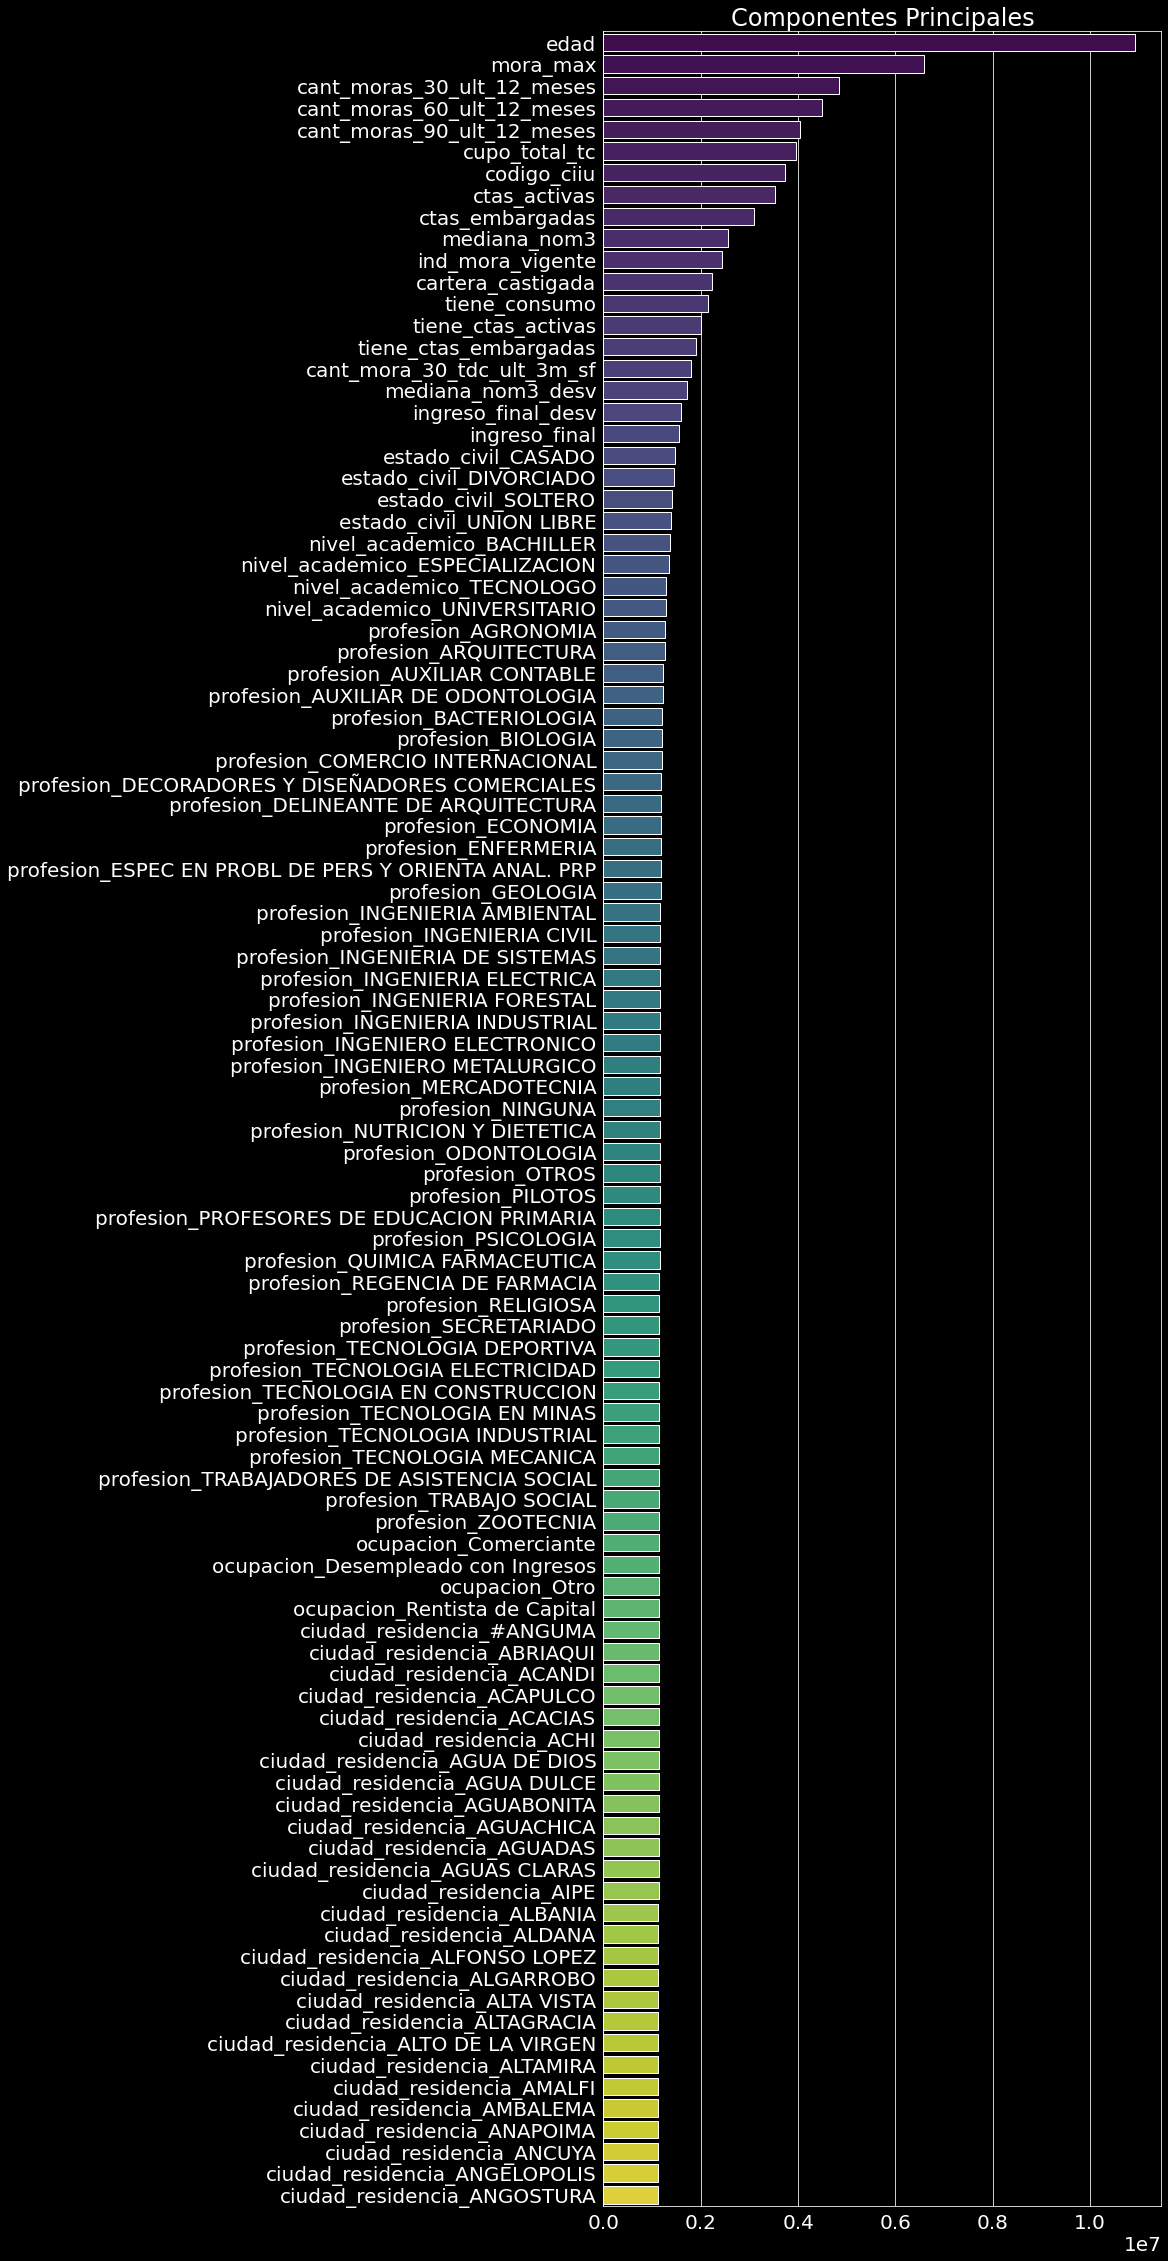

In [13]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Componentes Principales")

In [14]:
PCA.to_csv("/mnt/workstation/data/PCA.csv", index=False)

## Normalization

In [15]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_Nrm = Estandar.transform(df_onehot)
df_Nrm = pd.DataFrame(df_Nrm)
round(df_Nrm.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1092553.0,0.23,0.14,0.0,0.12,0.2,0.31,1.0
1,1092553.0,0.00,0.01,0.0,0.00,0.0,0.00,1.0
2,1092553.0,0.01,0.07,0.0,0.00,0.0,0.00,1.0
3,1092553.0,0.01,0.05,0.0,0.00,0.0,0.00,1.0
4,1092553.0,0.00,0.04,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
1599,1092553.0,0.14,0.34,0.0,0.00,0.0,0.00,1.0
1600,1092553.0,0.08,0.28,0.0,0.00,0.0,0.00,1.0
1601,1092553.0,0.04,0.19,0.0,0.00,0.0,0.00,1.0
1602,1092553.0,0.11,0.32,0.0,0.00,0.0,0.00,1.0


In [16]:
autovalores, autovectores = np.linalg.eig(df_Nrm.T.dot(df_Nrm))

In [17]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False)
PCA.head(50)

,Variable,Autovalor
0,edad,1.075599e+07
1,mora_max,9.165919e+05
2,cant_moras_30_ult_12_meses,8.095782e+05
3,cant_moras_60_ult_12_meses,6.287954e+05
4,cant_moras_90_ult_12_meses,4.195039e+05
5,cupo_total_tc,3.924442e+05
6,codigo_ciiu,2.969698e+05
7,ctas_activas,2.547675e+05
8,ctas_embargadas,2.266457e+05
9,mediana_nom3,2.018593e+05


Text(0.5, 1.0, 'Componentes Principales')

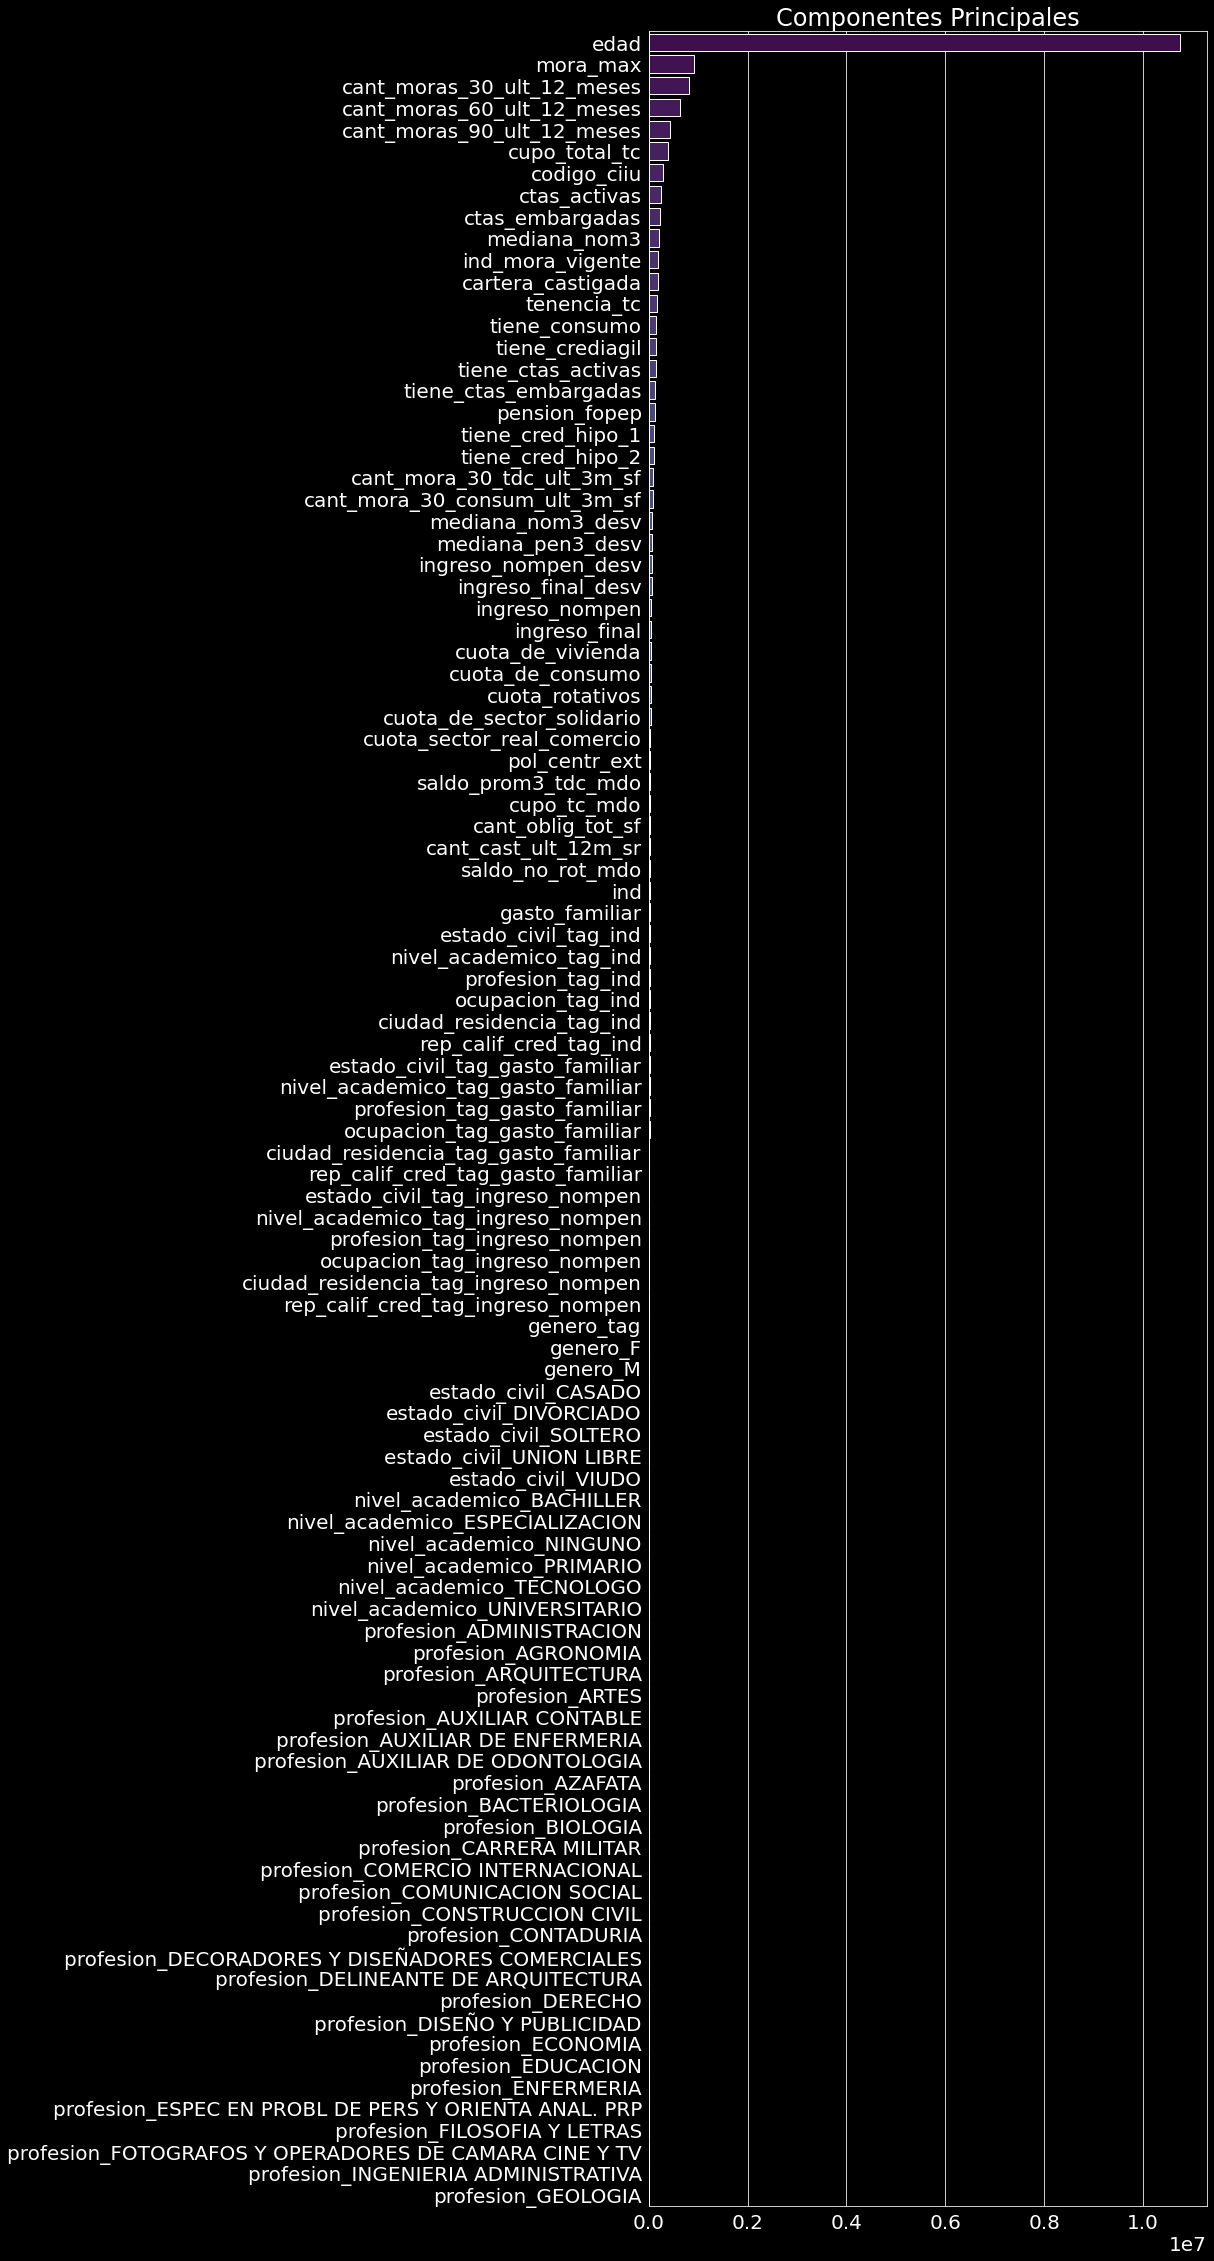

In [18]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Componentes Principales")

In [19]:
df_onehot['gasto_familiar'] = abs(df_onehot['gasto_familiar'])
df_log = np.log10(df_onehot+min(df_onehot['ind'])+1)

MemoryError: Unable to allocate 13.1 GiB for an array with shape (1604, 1092553) and data type float64

In [ ]:
df_Nrm_log = Estandar.transform(df_log)
df_Nrm_log = pd.DataFrame(df_log)
pd.options.display.max_rows = None
df_Nrm_log.describe()

In [ ]:
autovalores, autovectores = np.linalg.eig(df_Nrm_log.T.dot(df_Nrm_log))
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_Nrm_log.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False)
PCA
